# An Introduction to Neural Networks and Deep Learning

## 1. Overview

Because of their remarkable success in digital image processing, among other areas of data science, the origin of neural networks, the precusor to deep learning, is claimed by many disciplines and by many people.
* The "electronic brain" and the neuroscience of the 1950's.
* Computer science: Character recongition and the U.S. Postal Service. 
* Economics and finance: Let's make a million dollars!

Like many approaches in data science, the technique has waxed and waned through the ages, seemingly rediscovered each time.

Let's not focus on the past (despite my personal interest on the origin of algorithms).  Let's focus on the present.  Fortunately, we've already seen a simple example of a neural network: the logit classifier.
* The logit classifier is a simple neural network: feed-forward MLP with one hidden layer.
* A neural network builds on this simple concept by introducing many "logits" and tying them together with weights.
* We estimated the $\beta$'s of the logits via maximum likelihood.
* We tie them with weights that we also esimate via maximum likelihood.

## 2. Digression: Slides on Neural Networks and Deep Learning

### Computer science 
* Character recongition, the U.S. Postal Service, and Yann LeCun's famous MNIST data. 
* A Cambrian-like explosion since 2008.

### Economics and finance 
* See, among others, see papers by Ron Gallant (UNC), George Tauchen (Duke), and Hal White (UCSD). 
* Seemingly died out, despite tremendous increase in ease of use. 

## 3. A Simple Multilayered Perceptron

In [1]:
# Import relevant libraries, including MXNET and Keras.

%matplotlib inline
#import mxnet as mx
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib
from urllib.request import urlretrieve
import gzip
import struct
import pymc3 as pm

Using TensorFlow backend.


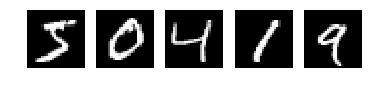

Training labels: [5 0 4 1 9]


In [2]:
# Keras has the famous LeCun et al. MNIST dataset of handwritten characters.
# One of the values of APIs like Keras and MXNET is they help to obviate webscapping.

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_digits = 5
for i in range(num_digits):
    plt.subplot(1, num_digits, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()
print('Training labels: %s' % (y_train[0:num_digits],))

In [3]:
# Preprocess the NMIST data, which are stored as 28 X 28 pixels of grayscale between 1 and 255.

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_pp = (X_train.reshape(X_train.shape[0], num_pixels).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], num_pixels).astype('float32')) / 255

In [4]:
# Quickly ensure everything has been normalized.

print(X_train_pp.mean(axis = 0))
print('')
print(X_train_pp[1])

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.23529444e-06   3.07189548e-05   1.41176470e-05   5.88235309e-07
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.04575167e-06   3.59477121e-06   3.64052321e-05   9.52287664e-05
   1.71437932e-04   2.51372519e-04   4.71111096e-04   6.30326860e-04
   6.83071790e-04   6.95817056e-04   7.42418168e-04   6.82941172e-04
   7.33071880e-04   6.02549058e-04   3.92614427e-04   2.79346423e-04
   2.11045743e-04   8.37908519e-05   3.95424831e-05   1.38562091e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [5]:
# Keras needs the labels as categorical matrics.

y_train_pp = np_utils.to_categorical(y_train)
y_test_pp = np_utils.to_categorical(y_test)
num_classes = y_test_pp.shape[1]

In [6]:
# Define a simple MLP with three hidden layers of 150, 300, and 150 neurons, respectively.
# First line of code: set a seed for replication.
# Second: Define the model to be sequential using Keras.
# Next three lines: 
    # Define the MLP, where number units sets the number of neurons
    # input_dim is the dimension of the data flowing in and passing through the layers.  It remains fixed.
    # activation is the sigmoidal shape of a neuron, here using the rectified linear unit or 'relu'
# Final line: 
    # We map into the number of classes we have for the digits with the softmax activation, which just chooses
    # the most probable.

np.random.seed(1066)
model = Sequential()
model.add(Dense(units=150, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=300, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=150, input_dim=num_pixels, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
4s - loss: 0.3254 - acc: 0.9076 - val_loss: 0.1506 - val_acc: 0.9561
Epoch 2/10
3s - loss: 0.1143 - acc: 0.9656 - val_loss: 0.1103 - val_acc: 0.9658
Epoch 3/10
3s - loss: 0.0771 - acc: 0.9759 - val_loss: 0.0965 - val_acc: 0.9706
Epoch 4/10
3s - loss: 0.0580 - acc: 0.9816 - val_loss: 0.0885 - val_acc: 0.9725
Epoch 5/10
3s - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0755 - val_acc: 0.9764
Epoch 6/10
3s - loss: 0.0357 - acc: 0.9883 - val_loss: 0.0718 - val_acc: 0.9790
Epoch 7/10
3s - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0787 - val_acc: 0.9774
Epoch 8/10
3s - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0852 - val_acc: 0.9751
Epoch 9/10
3s - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0914 - val_acc: 0.9761
Epoch 10/10
3s - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0807 - val_acc: 0.9794


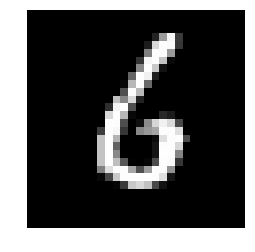

Classified as a 6 with probability 0.999994


In [7]:
# Examine the performance of the 50th image in the test set.

img = 50
plt.imshow(X_test[img], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
#prob = model.predict(X_test_pp)
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [8]:
# Standard measures of performance.
# First the accuracy rate on the test or validation set.

from sklearn.metrics import accuracy_score
print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))

Accuracy Rate: 0.979400


In [9]:
# Next the confusion matrix, which shows correct and incorrect classification on the test set.

from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))

Confusion matrix:
[[ 967    1    1    1    1    0    2    2    3    2]
 [   0 1121    2    4    0    2    2    1    3    0]
 [   2    0 1013    4    1    0    0    8    3    1]
 [   0    0    4  990    0    6    0    4    2    4]
 [   0    1    4    0  959    0    5    2    0   11]
 [   2    0    0    7    1  872    3    2    5    0]
 [   2    2    1    0    3    8  939    0    3    0]
 [   0    3    7    5    0    0    0 1007    3    3]
 [   1    0    3    1    4    6    0    4  952    3]
 [   1    3    0    7    4    6    1    7    6  974]]


In [10]:
# Next a classification report.

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.97      0.98      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.97      0.98      0.97       892
          6       0.99      0.98      0.98       958
          7       0.97      0.98      0.98      1028
          8       0.97      0.98      0.97       974
          9       0.98      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



In [11]:
# Finally, identify cases that failed.

(y_test - prob.argmax(axis = 1) > 0).nonzero()

(array([ 151,  247,  274,  320,  340,  445,  448,  495,  582,  674,  684,
         691,  882, 1014, 1226, 1232, 1247, 1319, 1393, 1425, 1500, 1530,
        1554, 1670, 1709, 1751, 1754, 1901, 2035, 2098, 2109, 2118, 2135,
        2189, 2293, 2387, 2454, 2582, 2607, 2648, 2654, 2721, 2915, 2927,
        2939, 2979, 3005, 3060, 3117, 3218, 3289, 3422, 3451, 3503, 3520,
        3558, 3559, 3567, 3597, 3751, 3808, 3838, 3853, 3926, 3941, 4224,
        4294, 4321, 4369, 4425, 4433, 4497, 4498, 4536, 4601, 4731, 4807,
        4956, 5676, 5937, 6166, 6560, 6571, 6625, 6632, 6755, 6847, 7179,
        7800, 7821, 8294, 8504, 9009, 9015, 9024, 9280, 9422, 9587, 9638,
        9692, 9755, 9756, 9768, 9770, 9782, 9792]),)

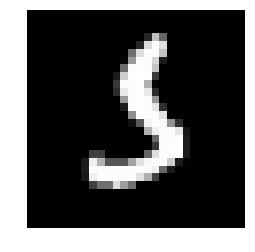

Classified as a 3 with probability 0.963660


In [12]:
img = 340
plt.imshow(X_test[img], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

* Assignment: Add an additional hidden layer with 300 neurons using the 'relu' activation.  How does your accuracy change?

## 4. Convolutional Neural Networks (CNN)

* Expensive computational improvement that you will want to run in a clustered computing environment (unless you have laundry to do).

In [13]:
# Load the libraries.

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [14]:
# Preprocess the NMIST data, but maintain datastructure for CNN.

X_train_pp = (X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')) / 255
X_test_pp = (X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')) / 255

In [15]:
# Format of basic CNN.
# The first hidden layer is a convolutional layer called a Convolution2D. 
# The layer has 32 feature maps, each of which are 5 X 5, and a rectifier activation function. 
# This is the input layer, expecting images with the structure of [pixels][width][height].
# A pooling layer is then defined to take the maximum called "MaxPooling2D". 
# The next layer is a regularization using dropout called "Dropout" which eliminates 25% of neurons per layer.
# Next is a layer that converts the 2D matrix data to a vector using "Flatten" 
    # which allows the output to be processed by standard fully connected layers.
# The final connection layer contains 128 neurons and rectifier activation function.
# Everything is finally reduced using perceptron layer.  

np.random.seed(1066)
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pp, y_train_pp, validation_data=(X_test_pp, y_test_pp), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test_pp, y_test_pp, verbose=0)
prob = model.predict(X_test_pp)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
173s - loss: 0.2492 - acc: 0.9289 - val_loss: 0.0810 - val_acc: 0.9749
Epoch 2/10
171s - loss: 0.0744 - acc: 0.9779 - val_loss: 0.0533 - val_acc: 0.9846
Epoch 3/10
170s - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0521 - val_acc: 0.9825
Epoch 4/10
169s - loss: 0.0431 - acc: 0.9868 - val_loss: 0.0357 - val_acc: 0.9890
Epoch 5/10
169s - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 6/10
169s - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0370 - val_acc: 0.9876
Epoch 7/10
170s - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0374 - val_acc: 0.9878
Epoch 8/10
170s - loss: 0.0198 - acc: 0.9935 - val_loss: 0.0338 - val_acc: 0.9886
Epoch 9/10
169s - loss: 0.0179 - acc: 0.9943 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 10/10
169s - loss: 0.0154 - acc: 0.9948 - val_loss: 0.0316 - val_acc: 0.9879


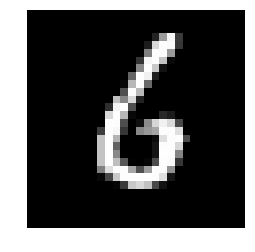

Classified as a 6 with probability 0.999999


In [16]:
# Examine the performance of the 50th image in the test set.

img = 50
plt.imshow(X_test[img], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

In [17]:
# Substantial, if very costly, improvement.
# Getting these to scale is both an engineering challenge and achievement.
# But when you're dealing with a billion or so pieces of mail, a 100 bp increase in accuracy is a lot of mail.

print('Accuracy Rate: %f' % accuracy_score(y_test, prob.argmax(axis = 1)))
print('')
print('Confusion matrix:\n%s' % confusion_matrix(y_test, prob.argmax(axis = 1)))
print('')
print('Classification Report:')
print(classification_report(y_test, prob.argmax(axis = 1)))
print('')
(y_test - prob.argmax(axis = 1) > 0).nonzero()

Accuracy Rate: 0.987900

Confusion matrix:
[[ 973    0    2    0    0    0    3    1    1    0]
 [   0 1129    2    0    0    0    2    1    1    0]
 [   1    1 1022    0    0    0    0    4    4    0]
 [   0    0    2  996    0    9    0    0    3    0]
 [   0    0    1    0  969    0    2    0    1    9]
 [   1    0    0    4    0  885    1    0    1    0]
 [   5    1    0    0    1    1  947    0    3    0]
 [   1    1    8    1    0    0    0 1014    1    2]
 [   3    0    1    0    0    1    0    2  964    3]
 [   2    1    0    2    6    7    0    5    6  980]]

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      1.00      1135
          2       0.98      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.

(array([ 247,  340,  445,  448,  684,  813,  882, 1014, 1039, 1226, 1232,
        1247, 1260, 1319, 1326, 1393, 1414, 1530, 1553, 1709, 1901, 2035,
        2118, 2129, 2293, 2414, 2462, 2582, 2597, 2648, 2654, 2896, 2921,
        2939, 3030, 3060, 3422, 3503, 3520, 3558, 3559, 3751, 4163, 4238,
        4248, 4497, 4761, 4807, 4814, 4823, 5887, 6091, 6157, 6172, 6173,
        6571, 6625, 7849, 8316, 9009, 9015, 9530, 9587, 9642, 9692]),)

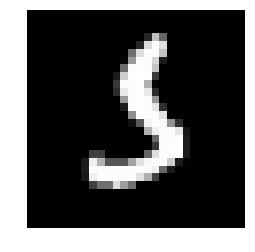

Classified as a 3 with probability 0.732379


In [18]:
img = 340
plt.imshow(X_test[img], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
print('Classified as a %d with probability %f' % (prob[img].argmax(), max(prob[img])))

# An Applications in Finance
## 1. The Capital Asset Pricing Model (CAPM)
* Early and simple workhorse model in empirical finance

* Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  

* The following equation can be derived:

$E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f)$

* Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.

* Phrases you may have heard: 

1. The stock's beta is high
2. The hedge fund is chasing alpha

* Formally, we can express our conjecture as a joint hypothesis:

$H_0: \alpha = 0, \beta=1$

$H_1: \text{ not }H_0$

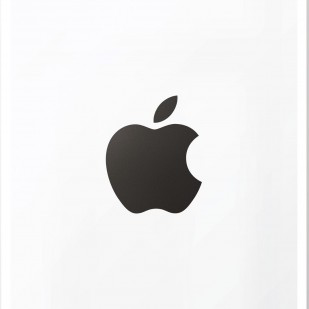

In [19]:
# When I teach, I stand in front of a sea of these.

from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("http://wallpaper.sc/en/iphone6plus/wp-content/uploads/2015/12/iphone6plus-1398x2592-wallpaper_02663-309x309.jpg")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

In [23]:
import pandas as pd
import pandas_datareader.data as web
import fix_yahoo_finance
#import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')

In [40]:
# Grab 10 years of Apple and NASDAQ data.  
# Note that the old Yahoo Finance API was deprecated.  (Thanks, Verizon!  That Marissa pay-out was steep.)
# Ran Aroussi has developed a fix that saves accessibility to Yahoo Finance. Thanks, Ran! Great stuff. 

start, end = "2006-01-01", "2015-12-31"
aapl_all = web.get_data_yahoo("aapl", start=start, end=end)
nasdaq_all = web.get_data_yahoo("^ixic", start=start, end=end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

[*********************100%***********************]  1 of 1 downloaded

In [41]:
nasdaq_all

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2216.530029,2249.679932,2189.909912,2243.739990,2243.739990,1998300000
2006-01-04,2246.959961,2265.280029,2246.070068,2263.459961,2263.459961,1887560000
2006-01-05,2264.929932,2277.560059,2264.500000,2276.870117,2276.870117,1891750000
2006-01-06,2289.209961,2306.719971,2281.010010,2305.620117,2305.620117,2233640000
2006-01-09,2306.179932,2322.629883,2303.129883,2318.689941,2318.689941,1949140000
2006-01-10,2306.219971,2320.320068,2303.929932,2320.320068,2320.320068,1978160000
2006-01-11,2321.409912,2332.919922,2316.489990,2331.360107,2331.360107,2380600000
2006-01-12,2327.169922,2330.310059,2313.219971,2316.689941,2316.689941,2011460000
2006-01-13,2317.739990,2321.699951,2308.159912,2317.040039,2317.040039,1784410000


### Plot Your Data (If You Can)

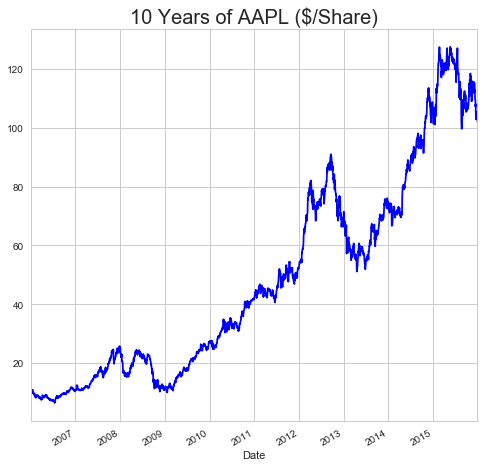

In [42]:
plt.figure(figsize = (8,8))
aapl.plot(color='blue')
plt.title('10 Years of AAPL ($/Share)', fontsize=20)

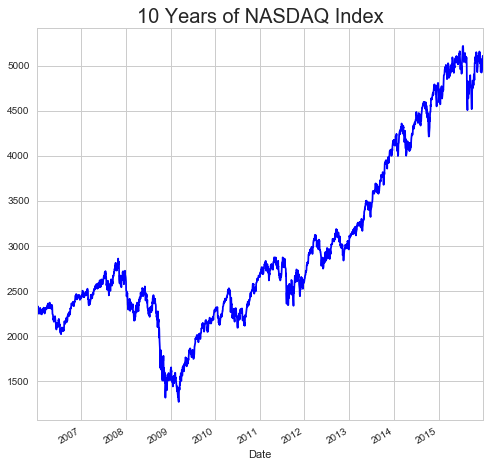

In [43]:
plt.figure(figsize = (8,8))
nasdaq.plot(color='blue')
plt.title('10 Years of NASDAQ Index', fontsize=20)

In [44]:
# Calculate daily returns.

aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

(0, 50)

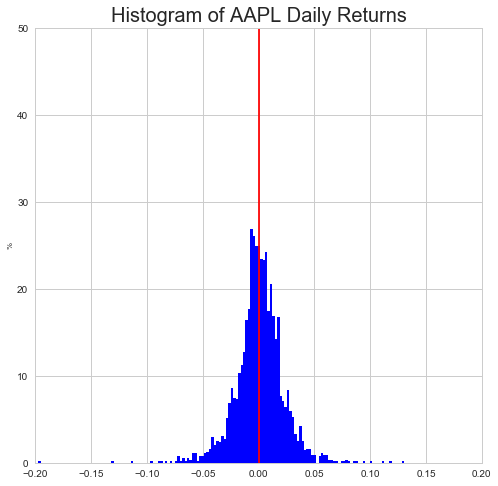

In [45]:
plt.figure(figsize=(8,8))
plt.hist(aapl_returns, bins=150, normed=True, color='blue')
plt.title('Histogram of AAPL Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 50)

(0, 50)

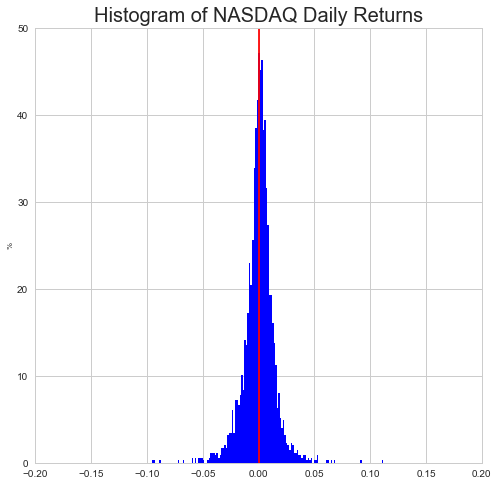

In [46]:
plt.figure(figsize=(8,8))
plt.hist(nasdaq_returns, bins=150, normed=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 50)

In [47]:
aapl_returns = pd.DataFrame(aapl_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

In [48]:
print(aapl_returns.describe())
print(nasdaq_returns.describe())

         Adj Close
count  2516.000000
mean      0.000938
std       0.021618
min      -0.197470
25%      -0.009446
50%       0.000897
75%       0.012243
max       0.130194
         Adj Close
count  2516.000000
mean      0.000319
std       0.013934
min      -0.095877
25%      -0.005501
50%       0.000957
75%       0.006919
max       0.111594


(-0.2, 0.2)

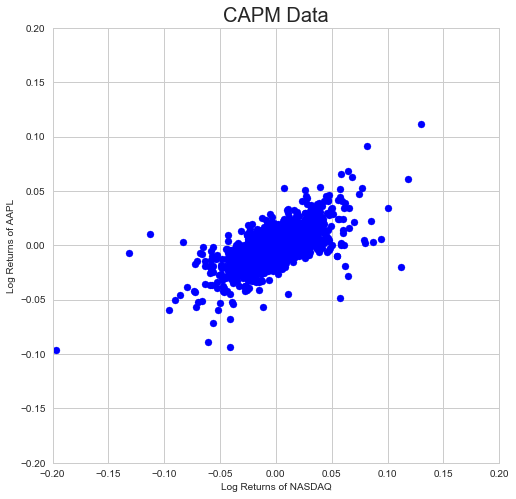

In [49]:
plt.figure(figsize = (8,8))
plt.scatter(aapl_returns, nasdaq_returns, color='blue')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of AAPL', fontsize = 10)
plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])

### Frequentist approach 
* Use regression to conduct Neyman-Pearson hypothesis testing.
* Easy to do and covered in earlier lectures.

### Let's do two different things
* Bayesian approach to inference (for fun).
* Predicting returns using deep learning.

## 1.1. Bayesian CAPM

In [50]:
# This is the syntax for PyMC3, 
# the Python library that allows one to do canned Bayesian estimation.
# See https://pymc-devs.github.io/pymc3/getting_started/.
# If you were to use this with different returns data,
# just replace 'nasdaq_returns' with the returns to the market
# and 'aapl_returns' with the returns to the particular stock

with pm.Model() as model:
    
    # alpha, beta, and sigma are the hyperparameters over which we have our priors, in this case they are flat priors.    
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    y_est = alpha + beta * nasdaq_returns
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=aapl_returns)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(1000, step, start=start, progressbar=True)

Optimization terminated successfully.
         Current function value: -6777.261138
         Iterations: 13
         Function evaluations: 28
         Gradient evaluations: 28


100%|██████████| 1000/1000 [00:46<00:00, 21.54it/s]


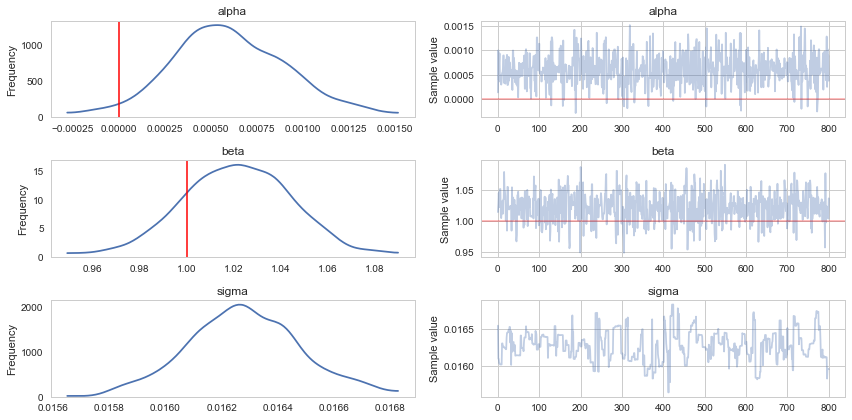

In [51]:
# Plot the posteriors.
# I prefer R's approach to this, which uses histograms rather than smoothed density plots.

fig = pm.traceplot(trace[199:1000], lines={'alpha': 0, 'beta': 1})
plt.figure(figsize = (8, 8))

In [52]:
# Start with averages and 95% credible intervals.

print("Average alpha and its 95% credible interval are:", np.mean(trace['alpha'][199:1000]), np.percentile(trace['alpha'][199:1000], (2.5, 97.5)))
print("Average beta and its 95% credible interval are:", np.mean(trace['beta'][199:1000]), np.percentile(trace['beta'][199:1000], (2.5, 97.5)))
print()

# Test two valuable hypotheses.
# alpha > 0
# beta < 1
# These are key inputs to decision making.

print("The probability that alpha is greater than zero is", np.mean(trace['alpha'][199:1000] > 0.0))
print("The probability that beta is less than one is", np.mean(trace['beta'][199:1000] < 1.0))
print("The joint probability is", np.all([[trace['alpha'][199:1000] > 0.0], [trace['beta'][199:1000] < 1.0]], axis = 0).mean())

Average alpha and its 95% credible interval are: 0.000598975160247 [ -1.22122275e-05   1.26603943e-03]
Average beta and its 95% credible interval are: 1.02135599747 [ 0.97203191  1.06517409]

The probability that alpha is greater than zero is 0.972534332085
The probability that beta is less than one is 0.178526841448
The joint probability is 0.169787765293


* Assignment: Change the priors on alpha and beta to U[-1, 1].  How do the results change?  What do you infer about the relevance of priors?

## 1.2. Predicting returns using deep learning

In [84]:
# Do a train/test split of .8/.2

from sklearn.model_selection import train_test_split

data = pd.merge(nasdaq_returns, aapl_returns, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
datatrain, datatest = train_test_split(data, test_size = 0.25, random_state=10191987)
#datatrain, datatest = train_test_split(data, test_size = 0.25)

In [85]:
# We need a baseline against which to compare the deep learner.  
# The most obvious is regression and its prediction or out-of-sample error, the MSE.

mod = smf.ols(formula='aapl ~ nasdaq', data = datatrain).fit()
#print(mod.summary())
datatrain['fitted'] = mod.predict(exog = datatrain)
datatest['fitted'] = mod.predict(exog = datatest)
#datatrain['fitted'] = mod.predict(exog = datatrain)

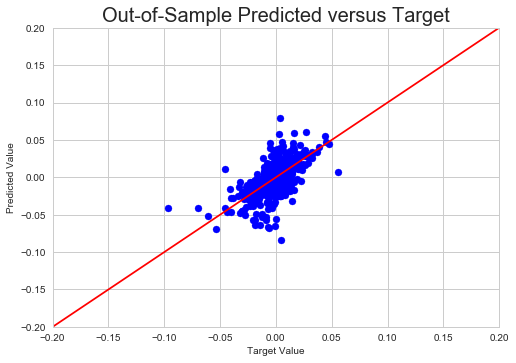

In [86]:
# Let's plot the out-of-sample predictions and compare with the target values 
# from the test set, together with a 45 degree line.
# A perfect predictor would yield a scatterplot clustered closely on the 45 degree line.
# Any values above the line indicate a prediction "overshoot".
# Any values below the line indicate a prediction "undershoot".

figure, ax = plt.subplots()
plt.scatter(datatest['fitted'], datatest['aapl'], color='blue')
plt.title('Out-of-Sample Predicted versus Target', fontsize = 20)
plt.xlabel('Target Value', fontsize = 10)
plt.ylabel('Predicted Value', fontsize = 10)
plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])
plt.plot(ax.get_ylim(), ax.get_ylim(), 'r-')

In [91]:
# The baseline against which to measure.

print('The average out-sample AAPL return is %f' % datatest['aapl'].mean())
print('The average predicted AAPL return is %f' % datatest['fitted'].mean())
print('The MSE is %f' % ((datatest['aapl'] - datatest['fitted'])**2).mean())

The average out-sample AAPL return is -0.000729
The average predicted AAPL return is 0.000354
The MSE is 0.000253


In [92]:
train_X = datatrain['nasdaq'].as_matrix()
train_y = datatrain['aapl'].as_matrix()
test_X = datatest['nasdaq'].as_matrix()
test_y = datatest['aapl'].as_matrix()

#data = aapl_returns.as_matrix()
#labels = nasdaq_returns.as_matrix()

#print(data.shape, labels.shape)
#dim = data.shape[1]
dim = 1

In [93]:
np.random.seed(1492)

model = Sequential()
model.add(Dense(units=500, activation='relu', input_dim=1))
model.add(Dense(units=1000, activation='relu', input_dim=1))
model.add(Dense(units=1000, activation='relu', input_dim=1))
model.add(Dense(units=500, activation='relu', input_dim=1))
model.add(Dense(units=1))

# Compile, fit, and generate scores and predicted probabilities.
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

#model.fit(data, labels, epochs=20, batch_size=100)
model.fit(train_X, train_y, epochs=20, batch_size=100, verbose=0)
target = model.predict(test_X)
datatest['target'] = target

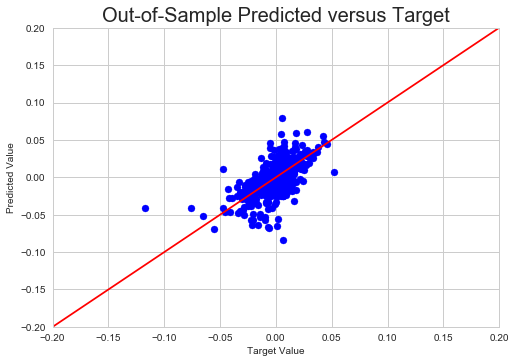

In [96]:
# Plot the results from the MLP.

figure, ax = plt.subplots()
plt.scatter(datatest['target'], datatest['aapl'], color='blue')
plt.title('Out-of-Sample Predicted versus Target', fontsize = 20)
plt.xlabel('Target Value', fontsize = 10)
plt.ylabel('Predicted Value', fontsize = 10)
plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])
plt.plot(ax.get_ylim(), ax.get_ylim(), 'r-')

In [97]:
print('The average out-sample AAPL return is %f' % datatest['aapl'].mean())
print('The average predicted AAPL return is %f' % datatest['target'].mean())
print('The MSE is %f' % ((datatest['aapl'] - datatest['target'])**2).mean())

The average out-sample AAPL return is -0.000729
The average predicted AAPL return is 0.001046
The MSE is 0.000260


### Interesting to Compare and Discuss

In [98]:
# Baseline.

print('The average out-sample AAPL return is %f' % datatest['aapl'].mean())
print('The average predicted AAPL return is %f' % datatest['fitted'].mean())
print('The MSE is %f' % ((datatest['aapl'] - datatest['fitted'])**2).mean())

The average out-sample AAPL return is -0.000729
The average predicted AAPL return is 0.000354
The MSE is 0.000253


In [99]:
# MLP.

print('The average out-sample AAPL return is %f' % datatest['aapl'].mean())
print('The average predicted AAPL return is %f' % datatest['target'].mean())
print('The MSE is %f' % ((datatest['aapl'] - datatest['target'])**2).mean())

The average out-sample AAPL return is -0.000729
The average predicted AAPL return is 0.001046
The MSE is 0.000260
